<a href="https://colab.research.google.com/github/Swatantrakumar-data/machine_leaning/blob/main/Copy_of_U2_MH2_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Problem Statement

Perform customer segmentation using bank data into distinct categories based on their behavioral patterns

## Learning Objectives

At the end of the experiment, you will be able to:

* Understand clustering
* Find groups or clusters using K-means algorithm
* Visualize the high-dimensional data to low-dimensional data (2D) by applying t-SNE algorithm

In [ ]:
#@title  Mini Hackathon Walkthrough
from IPython.display import HTML

HTML("""<video width="854" height="480" controls>
  <source src="https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Walkthrough/Customer_Segmentation.mp4" type="video/mp4">
</video>
""")

## Domain Information

- **Customer segmentation** refers to the process of dividing a set of potential customers into groups (or segments) based on shared attributes, interests, and behaviors.
- One of the key pain points for bank marketing team is to know their customers and identify their needs.
- For this mini-hackathon, we will use the popular **K-Means clustering** algorithm to segment customers based on their behavior from the bank data. The basic concept is that consumers who share common traits would respond to marketing communication in a similar way so that the bank marketing team can reach out to each group in a relevant and effective way.

## Dataset

### Description

The dataset chosen for this mini hackathon is the behavior of customers in the bank for 6 months, this dataset is made up of 13 features.

**Attribute Information**

- **CUSTID:** Identification of Credit Cardholder
- **BALANCE:** Balance amount left in customer's account to make purchases
- **PURCHASES:** Amount of purchases made from the account
- **INSTALLMENTS_PURCHASES:** Amount of purchase done in installment
- **CASH_ADVANCE:** Cash in advance given by the user
- **PURCHASES_FREQUENCY:** How frequently the Purchases are being made score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- **CASH_ADVANCE_FREQUENCY:** How frequently the cash in advance being paid
- **CASH_ADVANCE_TRX:** Number of Transactions made with "Cash in Advance"
- **CREDIT_LIMIT:** Limit of Credit Card for user
- **PAYMENTS:** Amount of Payment done by a user
- **MINIMUM_PAYMENTS:** Minimum amount of payments made by a user
- **PRC_FULL_PAYMENT:** Percent of full payment paid by a user
- **TENURE:** Tenure of credit card service for user

**Note:** The currency values mentioned above are in "dollars"

## Grading = 10 Marks

## Setup Steps

In [1]:
#@title Run this cell to complete the setup for this Notebook

from IPython import get_ipython
ipython = get_ipython()

notebook="U2_MH2_Customer_Segmentation" #name of the notebook
Answer = "This notebook is graded by mentors on the day of hackathon"
def setup():
    ipython.magic("sx wget https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Marketing_data_clustering.csv")
    print ("Setup completed successfully")
    return

setup()

Setup completed successfully


### Importing Required Packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score

## **Stage 1:** Data Pre-Processing (2 Marks)

- Replace the missing values in any other column appropriately with mean / median / mode.

  Hint: Use pandas [fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html) function to replace the missing values

- Perform correlation on the data features and remove highly correlated features from the data
  
  Hint: Use pandas [corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)

- Drop any unwanted columns
  
  Hint: Use pandas [drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

- Perform `StandardScaler()` on the data features
  
  Hint: Use Sklearns [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)



In [3]:
# YOUR CODE HERE
df=pd.read_csv("Marketing_data_clustering.csv")
df.head()


,CUST_ID,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,95.40,95.4,0.00000,0.166667,0.000000,0,1000.0,201.802084,139.509787,0.0,12
1,C10005,817.714335,16.00,0.0,0.00000,0.083333,0.000000,0,1200.0,678.334763,244.791237,0.0,12
2,C10008,1823.652743,436.20,436.2,0.00000,1.000000,0.000000,0,2300.0,679.065082,532.033990,0.0,12
3,C10009,1014.926473,861.49,200.0,0.00000,0.333333,0.000000,0,7000.0,688.278568,311.963409,0.0,12
4,C10015,2772.772734,0.00,0.0,346.81139,0.000000,0.083333,1,3000.0,805.647974,989.962866,0.0,12


In [4]:
df.shape

(2994, 13)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,2994.0,1203.715690,1025.943456,1.198223,379.893377,1036.419148,1678.253693,4940.113918
PURCHASES,2994.0,375.938988,443.534594,0.000000,0.000000,219.885000,574.552500,2315.860000
INSTALLMENTS_PURCHASES,2994.0,176.681246,256.328193,0.000000,0.000000,18.230000,291.225000,1170.490000
CASH_ADVANCE,2994.0,417.120996,649.995147,0.000000,0.000000,38.941802,626.843430,2780.106659
PURCHASES_FREQUENCY,2994.0,0.392006,0.372497,0.000000,0.000000,0.333333,0.750000,1.000000
CASH_ADVANCE_FREQUENCY,2994.0,0.101453,0.127583,0.000000,0.000000,0.083333,0.166667,0.500000
CASH_ADVANCE_TRX,2994.0,1.777221,2.423877,0.000000,0.000000,1.000000,3.000000,10.000000
CREDIT_LIMIT,2994.0,3192.027995,2423.088548,150.000000,1500.000000,2500.000000,4000.000000,13500.000000
PAYMENTS,2994.0,815.443883,696.084869,0.000000,351.734224,601.995631,1040.778351,4138.243604
MINIMUM_PAYMENTS,2945.0,469.319733,352.636672,2.891346,198.933162,351.642621,634.569311,1801.264841


In [7]:
df.isna().sum()

CUST_ID                    0
BALANCE                    0
PURCHASES                  0
INSTALLMENTS_PURCHASES     0
CASH_ADVANCE               0
PURCHASES_FREQUENCY        0
CASH_ADVANCE_FREQUENCY     0
CASH_ADVANCE_TRX           0
CREDIT_LIMIT               0
PAYMENTS                   0
MINIMUM_PAYMENTS          49
PRC_FULL_PAYMENT           0
TENURE                     0
dtype: int64

In [9]:
#As the missing values are numerical and distribution of the data points is normal, mean can be used to fill null values in MINIMUM_PAYMENTS
print(df["MINIMUM_PAYMENTS"].mean())

469.31973318641764


In [10]:
df["MINIMUM_PAYMENTS"]=df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean())
df.isna().sum()

CUST_ID                   0
BALANCE                   0
PURCHASES                 0
INSTALLMENTS_PURCHASES    0
CASH_ADVANCE              0
PURCHASES_FREQUENCY       0
CASH_ADVANCE_FREQUENCY    0
CASH_ADVANCE_TRX          0
CREDIT_LIMIT              0
PAYMENTS                  0
MINIMUM_PAYMENTS          0
PRC_FULL_PAYMENT          0
TENURE                    0
dtype: int64

<ipython-input-11-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

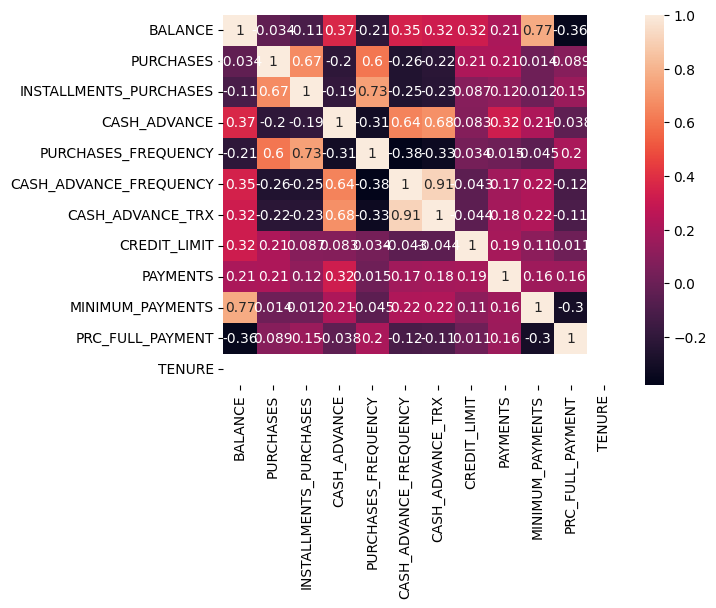

In [11]:
sns.heatmap(df.corr(),annot=True)

In [12]:
def remove_Highly_Correlated(df, bar):
  # Creates correlation matrix
  corr = df.corr()

  # Set Up Mask To Hide Upper Triangle
  mask = np.triu(np.ones_like(corr, dtype=bool))
  tri_df = corr.mask(mask)

  # Finding features with correlation value more than specified threshold value (bar=0.6)
  highly_cor_col = [col for col in tri_df.columns if any(tri_df[col] > bar )]
  print("length of highly correlated columns",len(highly_cor_col))

  # Drop the highly correlated columns
  reduced_df = df.drop(highly_cor_col, axis = 1)
  print("shape of data",df.shape,"shape of reduced data",reduced_df.shape)
  return reduced_df

In [13]:
df1= remove_Highly_Correlated(df, 0.7)
df1.columns

length of highly correlated columns 3
shape of data (2994, 13) shape of reduced data (2994, 10)


<ipython-input-12-7e26f916f388>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


Index(['CUST_ID', 'PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'CASH_ADVANCE_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS',
       'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [14]:
df1.drop(columns = ["TENURE", "CUST_ID", "PRC_FULL_PAYMENT"],axis=1, inplace = True)

In [15]:
df1.columns

Index(['PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'CASH_ADVANCE_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS'],
      dtype='object')

In [16]:
sc = StandardScaler()
scaled_df= sc.fit_transform(df1.values)
scaled_df_final = pd.DataFrame(scaled_df, index = df1.index, columns = df1.columns)
scaled_df_final

,PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,CASH_ADVANCE_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
0,-0.632613,-0.641837,-0.605044,-0.733337,-0.904793,-0.881709,-0.943177
1,-0.811660,-0.641837,-0.828798,-0.733337,-0.822240,-0.197005,-0.642098
2,0.135888,-0.641837,1.632485,-0.733337,-0.368198,-0.195955,0.179348
3,1.094914,-0.641837,-0.157540,-0.733337,1.571799,-0.182717,-0.450001
4,-0.847739,-0.108188,-1.052550,-0.320706,-0.079263,-0.014075,1.488914
...,...,...,...,...,...,...,...
2989,2.241600,-0.641837,-0.828798,-0.733337,-0.739687,-0.314322,-0.050718
2990,0.517703,-0.641837,1.632485,-0.733337,-0.698411,-0.436523,-0.841647
2991,0.147840,-0.641837,1.632485,-0.733337,-0.904793,-0.478320,-1.080964
2992,-0.182517,-0.641837,0.289967,-0.733337,-0.904793,-0.818650,-0.864201


## **Stage 2:** K Means (3 Marks)

- Find the right number of clusters to be chosen using the elbow method
  
- Perform K-Means on the chosen optimal number of clusters

  **Hint:** Refer to this [link](https://towardsdatascience.com/clustering-algorithms-for-customer-segmentation-af637c6830ac) for finding the k-clusters using elbow method and applying kmeans

In [17]:
df1.columns

Index(['PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'CASH_ADVANCE_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS'],
      dtype='object')

In [18]:
# YOUR CODE HERE
def errors():
  wcss=[]
  for i in range(1,11):
    km=KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    km.fit(scaled_df_final)
    wcss.append(km.inertia_)
  return wcss


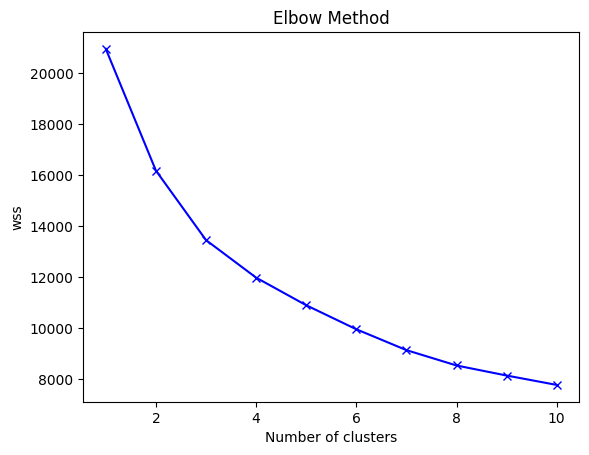

In [20]:
def elbow_plot():
  wcss = errors()
  plt.plot(range(1,11),wcss,'bx-')
  plt.title('Elbow Method')
  plt.xlabel('Number of clusters')
  plt.ylabel('wss')
  plt.show()

elbow_plot()

In [21]:
#From elbow method, it is significant that we can best classify bank customers data into 3 clusters

In [22]:
km3=KMeans(n_clusters=3,max_iter=300,random_state=40)
model=km3.fit_predict(scaled_df_final)
print(km3.cluster_centers_)
print(km3.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[ 0.80362621 -0.51644322  0.97162401 -0.55791532  0.18226159  0.065576
  -0.1027588 ]
 [-0.36398494  1.56152045 -0.52667792  1.3612078   0.23525031  0.693956
   0.51236082]
 [-0.58629405 -0.32074303 -0.66335831 -0.17537428 -0.29994248 -0.42804791
  -0.16977015]]
[2 2 0 ... 0 2 0]


## **Stage 3:** Apply **TSNE** with 2 components (n_components = 2) and visualize the clusters (3 Marks)

Hint: Use Sklearns [TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)

**Note:** Produce a visualization with distinctly isolated clusters and It is not necessary to plot the centroids



In [23]:
# YOUR CODE HERE
import warnings
warnings.filterwarnings("ignore")
tsne=TSNE(n_components=2,verbose=1)
tsne_data=tsne.fit_transform(scaled_df_final)
#tsne_data=tsne.fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2994 samples in 0.005s...
[t-SNE] Computed neighbors for 2994 samples in 0.180s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2994
[t-SNE] Computed conditional probabilities for sample 2000 / 2994
[t-SNE] Computed conditional probabilities for sample 2994 / 2994
[t-SNE] Mean sigma: 0.431968
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.465256
[t-SNE] KL divergence after 1000 iterations: 1.213097


In [24]:
tsne_data.shape

(2994, 2)

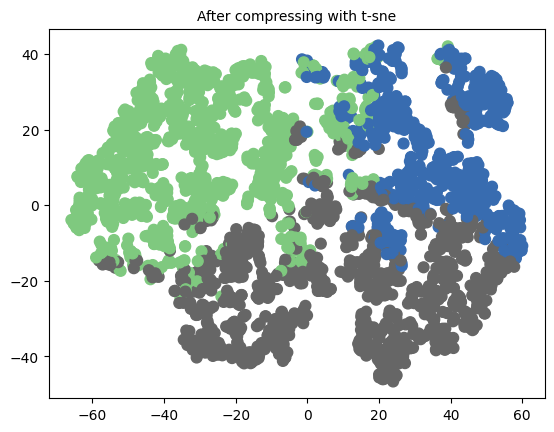

In [26]:
plt.title('After compressing with t-sne',  fontsize=10)
plt.scatter(tsne_data[:, 0],tsne_data[:, 1], c = model, cmap="Accent", s=60)

## **Stage 4:** Insights for each cluster

#### **Stage 4(a)** (1 Mark):
- To understand the behavior of the customers from each cluster print the respective centroid point values obtained from the scaled dataframe
- Get the original representation of the scaled centroid points using [inverse_transformation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.inverse_transform) technique

In [27]:
# YOUR CODE HERE
km=KMeans(n_clusters=3,max_iter=300,random_state=40)
model=km.fit_predict(scaled_df_final)
km.cluster_centers_

array([[ 0.80362621, -0.51644322,  0.97162401, -0.55791532,  0.18226159,
         0.065576  , -0.1027588 ],
       [-0.36398494,  1.56152045, -0.52667792,  1.3612078 ,  0.23525031,
         0.693956  ,  0.51236082],
       [-0.58629405, -0.32074303, -0.66335831, -0.17537428, -0.29994248,
        -0.42804791, -0.16977015]])

In [29]:
inv_data=sc.inverse_transform(km.cluster_centers_)
df3=pd.DataFrame(inv_data,columns=df1.columns)
df3

,PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,CASH_ADVANCE_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
0,732.315482,81.491474,0.753873,0.425129,3633.590205,861.082717,433.387062
1,214.526038,1431.932193,0.195853,5.076070,3761.965135,1298.415477,648.481935
2,115.940724,208.674400,0.144949,1.352206,2465.362198,517.535971,409.954549


#### **Stage 4(b)** (1 Mark):
- Report your observations in the form of text, about the customers based on the centroid points

Hint: If require use [clustermap](https://seaborn.pydata.org/generated/seaborn.clustermap.html)

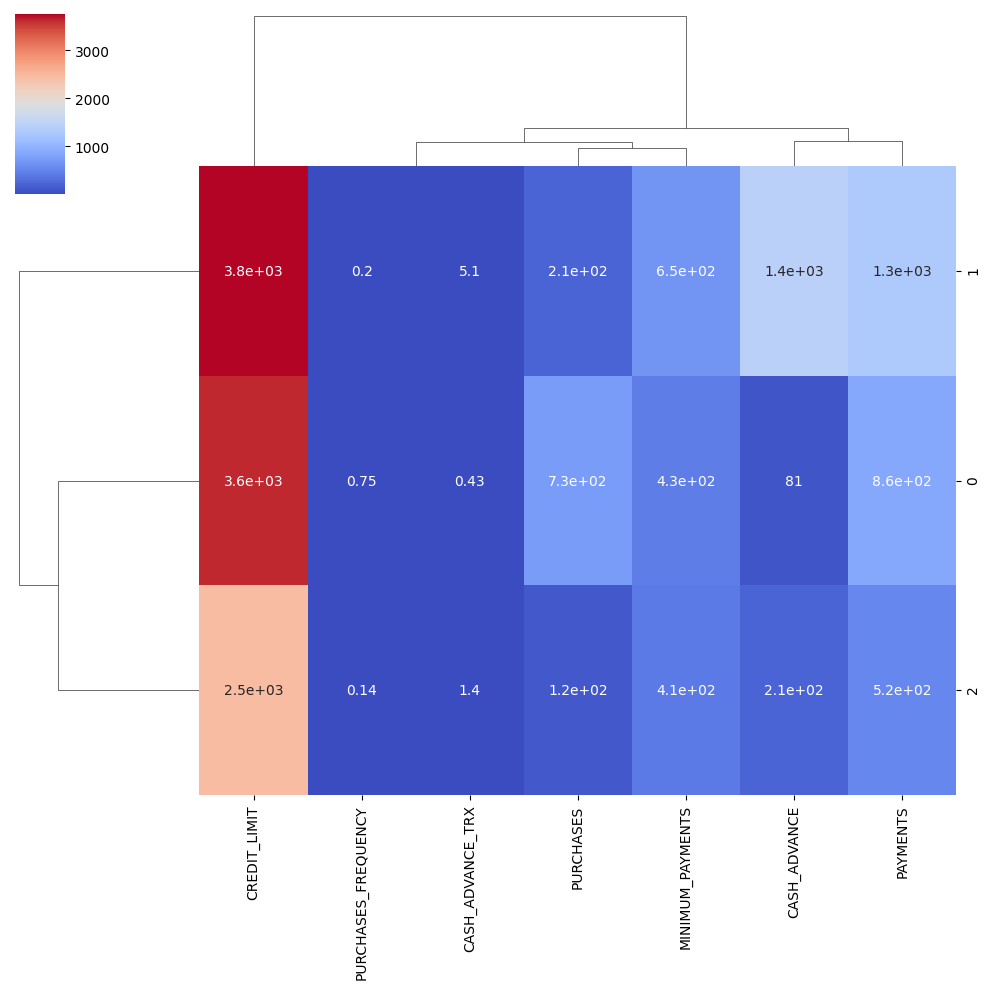

In [30]:
# YOUR ANALYSIS HERE
import seaborn as sns
sns.clustermap(pd.DataFrame(inv_data, columns = df1.columns), cmap='coolwarm',annot=True)

#sns.clustermap(km.cluster_centers_, cmap='coolwarm',annot=True)

In [32]:
# CONCLUSION
#cluster - 0: More Purchases,Average minimum payments, Average Payments,average credit limit

#cluster -1:More Minimum payments,high credit limit
#cluster -2:Low minimum payments, average payments,low credit limit
